<head>
  <font size="+3"><b>Informe taller 4:</b></font>
</head>

En el presente taller se resolvió el problema de potabilidad del agua por medio de SVM usando los siguientes kernels: 1) Polinomial 2) Gaussiano.

<h><font size="+2"><b> Introducción</b></font></h>

El método de SVM permite clasificar datos de dos diferentes clases, típicamente etiquetados con valor de 1 o -1. Para el caso de datos linealmente separables se busca encontrar una ecuación del tipo $y = signo{({\vec{w}}^T\vec{x} + b)}$, que en el caso de 2 features separa los datos en una recta, en el caso de 3 los separa en un plano y en el caso de mas features los separa en un hiperplano. En este método se busca que el margen o la distancia que separa los datos de cualquiera de las dos clases con la recta, plano o hiperplano sea máximo. Es decir, se desea maximizar la distancia entre la línea naranja y verde indicada en la figura 1:

<img src=" 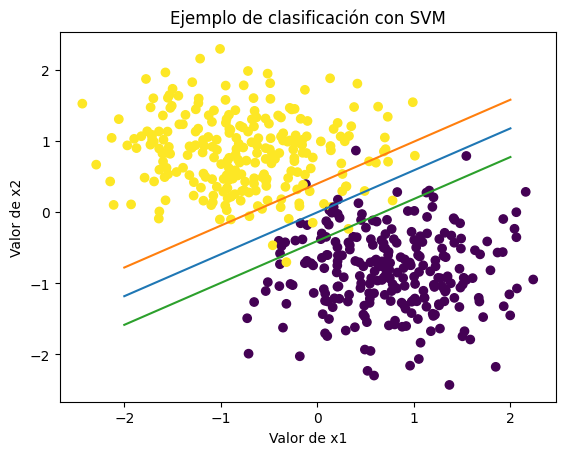" />

Figura 1: Ejemplo de separación de datos de juguete lienalmente separables con 2 features

Para generar estos datos de la figura con sus rectas se ejecutó un código creado, con datos de juguete, para estudiar el segundo parcial. Este se encuentra en los anexos. 
En otras palabras el método de SVM busca resolver el siguiente problema de optimización:


<h><font size="+1">
Minimizar:

*    $\frac{1}{2}||{\vec{w}}||^2 + C\sum_{j=1}^{N_{dat}}{\zeta_j}$

Sujeto a: 

*    $y_j({\vec{w}^T}{\vec{x_j}} +b) - 1 + \zeta_j \ge 0$
*    $\zeta_j \ge 0$
</font></h>

Resolver este problema de optimización es equivalente a resolver el problema dual el cual consiste en lo siguiente:

<h><font size="+1">
Maximizar:

*    $\sum_{j=1}^{N_{dat}}{\alpha_j} - \frac{1}{2}\sum_{j=1}^{N_{dat}}\sum_{l=1}^{N_{dat}}{\alpha_j \alpha_l y_j y_l {\vec{x_j}}^T\vec{x_l}}$

Sujeto a: 

*    $\sum_{j=1}^{N_{dat}}{\alpha_j y_j} = 0$
*    $0 \le \alpha_j \le C$
</font></h>

Al encontrar el $\vec{\alpha}$ óptimo se pude encontrar $\vec{w}$ y $b$. Para encontrar cada uno se reemplaza en las siguiente expresiones:
*   $\vec{w} = \sum_{j = 1}^{N_{dat}}{\alpha_j y_j \vec{x_j}}$
*   $y_j(\vec{w}^T \vec{x_j} + b) = 1$ Donde estrictamente $0 < \alpha_j < C$. Note que no está el "menor o igual" solo el "menor"

En caso de que los datos no sean lienalmente separables se puede introducri un kernel. Para este ejercicio, este kernel puede ser Polinomial o Gaussiano:

*   Kernel Polinomial: $k_{(\vec{x_j},\vec{x_l})} = (\vec{x_j}^T \vec{x_l} + c)^d$
*   Kernel Gaussiano: $k_{(\vec{x_j},\vec{x_l})} = e^{(-\frac{||\vec{x_j} - \vec{x_l}||^2}{2\sigma²})}$

Para introducir el kernel en nuestro problema de optimización simplemente cambiamos los productos punto por el kernel. De esta manera el proble de optimización dual queda: 

<h><font size="+1">
Maximizar:

*    $\sum_{j=1}^{N_{dat}}{\alpha_j} - \frac{1}{2}\sum_{j=1}^{N_{dat}}\sum_{l=1}^{N_{dat}}{\alpha_j \alpha_l y_j y_l k_{(\vec{x_j},\vec{x_l})}}$

Sujeto a: 

*    $\sum_{j=1}^{N_{dat}}{\alpha_j y_j} = 0$
*    $0 \le \alpha_j \le C$
</font></h>

Para clasificar algún punto simplemente seguimos las siguientes expresiones:
*    $\hat{y} = signo(\sum_{j=1}^{N_{dat}}{\alpha_j y_j k_{(\vec{x_j}, \vec{x})}} + b)$
*    En donde $b$ cumple que: $y_j(\sum_{l = 1}^{N_{dat}}{\alpha_l y_l k_{(\vec{x_l},\vec{x_j})}} + b) = 1$ Donde estrictamente $0 < \alpha_j < C$


<h><font size="+2"><b> Metodología</b></font></h>

En el presente taller se buscó clasificar datos de potabilidad de agua mediante SVM presente en la librería de scikit-learn. Lo primero que se hizo fue ignorar los datos cuyas filas tuvieran un feature vacío. Luego estos fueron normalizados con el "StandardScaler" de scikit-learn y se separaron en muestres de entrenamiento y de test. Luego se procedio a realizar los siguientes pasos, tanto para el uso del kernel polinomial como para el uso del kernel Gaussiano:

1)  Se creó la clase del modelo de SVM y se definió una cuadrícula para el modelo. Esta es una cuadrícula de parámetros que schikit-learn va a evaluar o "sintonizar", se supone que uno por uno (la documentación de GridSearchCV no dice cómo exactamente) y se queda con aquel perámetro que arroje los mejores resultados. En el caso del kernel Polinomial los parámetros que se prueban  o sintonizan son el grado del polinomio (se probó con polinomios grado 2, 3, 4, 5 y 10) y la constante $C$ la cual es la constante de la expresión: $\frac{1}{2}||{\vec{w}}||^2 + C\sum_{j=1}^{N_{dat}}{\zeta_j}$. Para el caso del kernel Gaussiano los parámetros que se prueban o sintonizan es la misma constante $C$ ya mencionada y el valor de "gamma" el cual se relaciona con el valor de $\sigma$ de la siguiente manera, de acuerdo a la documentación de SVC() de scikit-learn: $\gamma = \frac{1}{N_{features}{\sigma}^2}$ en el caso de que se escoja la opción "scale". En caso de que se escoja la opción "auto" se calcula el valor de $\gamma$ de la siguiente manera: $\gamma = \frac{1}{N_{features}}$. En este segundo caso, la documentación no menciona que valor de la a $\sigma$, por lo que se asumirá que le da un valor de 1 y coloca el valor de ${N_{features}}$ en el denominador de la exponencial en el kernel Gaussiano. Enlace de la documentación de SVC(): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. Estos parámetros son consignados en un objeto llamado "grid_search".   
*  Documentación de GridSearchCV(): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

2)  Una vez se definen todos los parámetros a probar, se entrena un modelo de SVM para cada posible combinación de parámetros definidos en el "grid_search". El propio "grid_search" hereda los métodos del objeto del modelo svm (llamado SVC()). De esta manera, al ejecutar grid_search.train(X_train, Y_train) se entrena un modelo, con los datos de entrenamiento, por cada posible combinación de parámetros.

3)  Se selecciona el modelo que haya resultado con la mejor métrica especificada. Por ejemplo, para el ejercicio del kernel polinomial se definió que la métrica que iba a definir al mejor modelo iba a ser la exactitud o el "accuracy": grid_search = GridSearchCV(svm_model, params_grid, cv=5, scoring='accuracy', verbose=1). Es decir, en este caso, la línea de código "best_svm = grid_search.best_estimator_" selecciona el modelo con mas exactitud. 

4)  Se evalúa el modelo seleccionado (como mejor modelo de acuerdo a la exactitud) en los datos de testeo y se genera un vector de respuesta llamado "y_pred".

5)  Finalmente se compara el vector de respuesta "y_pred" con las etiquetas de los datos de testeo "y_test"

<h><font size="+2"><b> Resultados </b></font></h>

Se puede observar que el modelo SVM con un kernel polinomial, grado 2 obtuvo una exactitud mayor, ya que logró clasificar correctamente el 70% de los datos de test, mientras que el kernel gaussiano clasificó correctamente el 67% de los datos de test. Las precisiones del modelo con kernel Gaussiano también fueron mayores. Con las precisiones definidas a continuación:

*   Precisión para positivos: $P_1 = \frac{TP}{TP + FP}$ 

*   Precisión para negativos: $P_0 = \frac{TN}{TN + FN}$

El kernel polinomial obtuvo un valor de $P_0 = 0.67$ y un valor de $P_1 = 0.82$, mientras que el kernel Gaussiano obtuvo un valor de $P_0 = 0.66$ y un valor de $P_1= 0.73$. Por otro lado, definiendo al sensibilidad (o "recall") de la siguiente manera: 

*   Sensibilidad para positivos: $S_1 = \frac{TP}{TP+FN}$

*   Sensibilidad para negativos: $S_0 = \frac{TN}{TN+FP}$

En este caso el kernel polinomial también tuvo maoyres valores de sensibilidad, los cuales fueron $S_0 = 0.94$ y $S_1 = 0.38$ en contraste con los valores del modelo con el kernel gaussiano, el cual tuvo valores de sensibilidad de $S_0 = 0.90$ y $S_1 = 0.38$

NOTA: Estos valores púeden cambiar ligeramente al ejecutar el código nuevamente, si se cambia el "random_state". 

Se puede ver que el desempeño del modelo SVm entrenado con kernel Gaussiano es superior en todas las métricas. 

<h><font size="+2"><b> Conclusiones </b></font></h>

De acuerdo a los resultados obtenidos se recomienda usar el kernel polinomial grado 2  al usar un modelo de SVM para clasificar la potabilidad del agua, ya que, el modelo entrenado con este kernel es superior en todas las métricas con los datos de test que el modelo entrenado con un kernel gaussiano. También se recomienda usar el modelo de SVM polinomial en vez de usar los modelos de Random Forest, Xgboost y Adaboost con decision stumps, vistos en el anterior taller, ya que el modelo de SVM logró clasificar correctamente un porcentaje mayor de los datos de test. A pesar de que el kernel polinomial fue el mejor, este apenas logró clasificar un 70% de los datos de test correctamente. Este se puede mejorar, ya sea aplicándolo a un algoritmo de boosting como Adaboost o bien probando otros grados de polinomios y probando con kerneles polinomiales no homogéneos, o bien con todas las sugerencias anteriores. 

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Cargar los datos
datos = pd.read_csv('water_potability.csv').dropna()
print("Forma por defecto del dataset '.csv': \n", list(datos.keys()))

# 2. Preprocesar los datos si es necesario
X = datos.drop('Potability', axis=1)
y = datos['Potability']

# Lidiar con los valores nulos, normalizar, etc.
scaler = StandardScaler()
X_n= scaler.fit_transform(X)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=42)

Forma por defecto del dataset '.csv': 
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


#### 1.Resuelva el problema utilizando un SVM con un kernel polinomial. Sintonice apropiadamente los parámetros del kernel y la constante C.

In [3]:
params_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'degree': [2, 3, 4, 5, 10],  # Solo para el kernel polinomial
    'kernel': ['poly']  # 'poly' para polinomial, 'rbf' para gaussiano
}

In [4]:
# Creación del modelo SVM para la búsqueda en cuadrícula
svm_model = SVC()

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_model, params_grid, cv=5, scoring='accuracy', verbose=1)

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

# Obtención del mejor modelo
best_svm = grid_search.best_estimator_

# Evaluación del modelo
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [5]:
print(f"Accuracy of the best SVM model: {accuracy}")
print(classification_report(y_test, y_pred))
print(grid_search.best_params_)

Accuracy of the best SVM model: 0.6997518610421837
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       231
           1       0.82      0.38      0.52       172

    accuracy                           0.70       403
   macro avg       0.75      0.66      0.65       403
weighted avg       0.74      0.70      0.67       403

{'C': 10, 'degree': 2, 'kernel': 'poly'}


#### 2. Resuelva el problema utilizando un SVM con un kernel gaussiano. Sintonice apropiadamente los parámetros del kernel y la constante C

In [6]:
params_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': ['scale', 'auto'],  # Solo para el kernel gaussiano
    'kernel': ['rbf']  # 'poly' para polinomial, 'rbf' para gaussiano
}

In [7]:
# Creación del modelo SVM para la búsqueda en cuadrícula
svm_model = SVC()

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_model, params_grid, cv=5, scoring='accuracy', verbose=1)

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

# Obtención del mejor modelo
best_svm = grid_search.best_estimator_

# Evaluación del modelo
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [8]:
print(f"Accuracy of the best SVM model: {accuracy}")
print(classification_report(y_test, y_pred))
print(grid_search.best_params_)

Accuracy of the best SVM model: 0.674937965260546
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       231
           1       0.73      0.38      0.50       172

    accuracy                           0.67       403
   macro avg       0.69      0.64      0.63       403
weighted avg       0.69      0.67      0.65       403

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


#### 3. Evalúe sus dos modelos resultantes en los datos de prueba con métricas apropiadas y compare su desempeño.

El resultado de la evaluación de los modelos se discute en la sección de "Resultados" en el informe del presente trabajo en las primeras celdas de "markdown". Las conclusiones también se encuentran en las primeras celdas de markdown


<h><font size="+2"><b> Anexos</b></font></h>

<h><font size="+1"> Código para generar datos de juguete, clasificarlos y generar la figura 1: </font></h>

Ignorar otras gráficas. Estos códigos se hicieron con el propósito de estudiar para el parcial 2, pero no se llegaron a terminar del todo

<h><font size="+1"><b> Creación de los datos de juguete para SVM </b></font></b>

<p> Se crearon 3 serts de datos de juguete: </p>

*   El primer set son unos datos concéntricos, los cuales espero separar con un kernel gaussiano
*   El segundo set son uno datos en forma de media luna, los cuales espero separar con kernel polinomial
*   El tercero es un set de datos, aparentemente linealmente separables. A estos no les aplico ningún kernel


In [9]:
from sklearn import datasets
import scipy as sp
from scipy import optimize

In [10]:
N_datos = 500
X_circ, y_circ = datasets.make_circles(n_samples = N_datos, noise = 0.2, factor = 0.7)
X_moon, y_moon = datasets.make_moons(n_samples = N_datos, noise = 0.3)
X_clus, y_clus = datasets.make_blobs(n_samples = N_datos, n_features = 2, centers = ((3,1), (0,5)), cluster_std=1.33)
y_clus = (2*y_clus) - 1
y_moon = (2*y_moon) - 1
y_circ = (2*y_circ) - 1

In [11]:
def normalizar(datos):
    for i in range(len(datos[0,:])):
        datos[:,i] = (1/np.std(datos[:,i]))*(datos[:,i] - np.average(datos[:,i]))
    #fin for 
#fin función
    
#fin función
normalizar(X_circ)
normalizar(X_clus)
normalizar(X_moon)

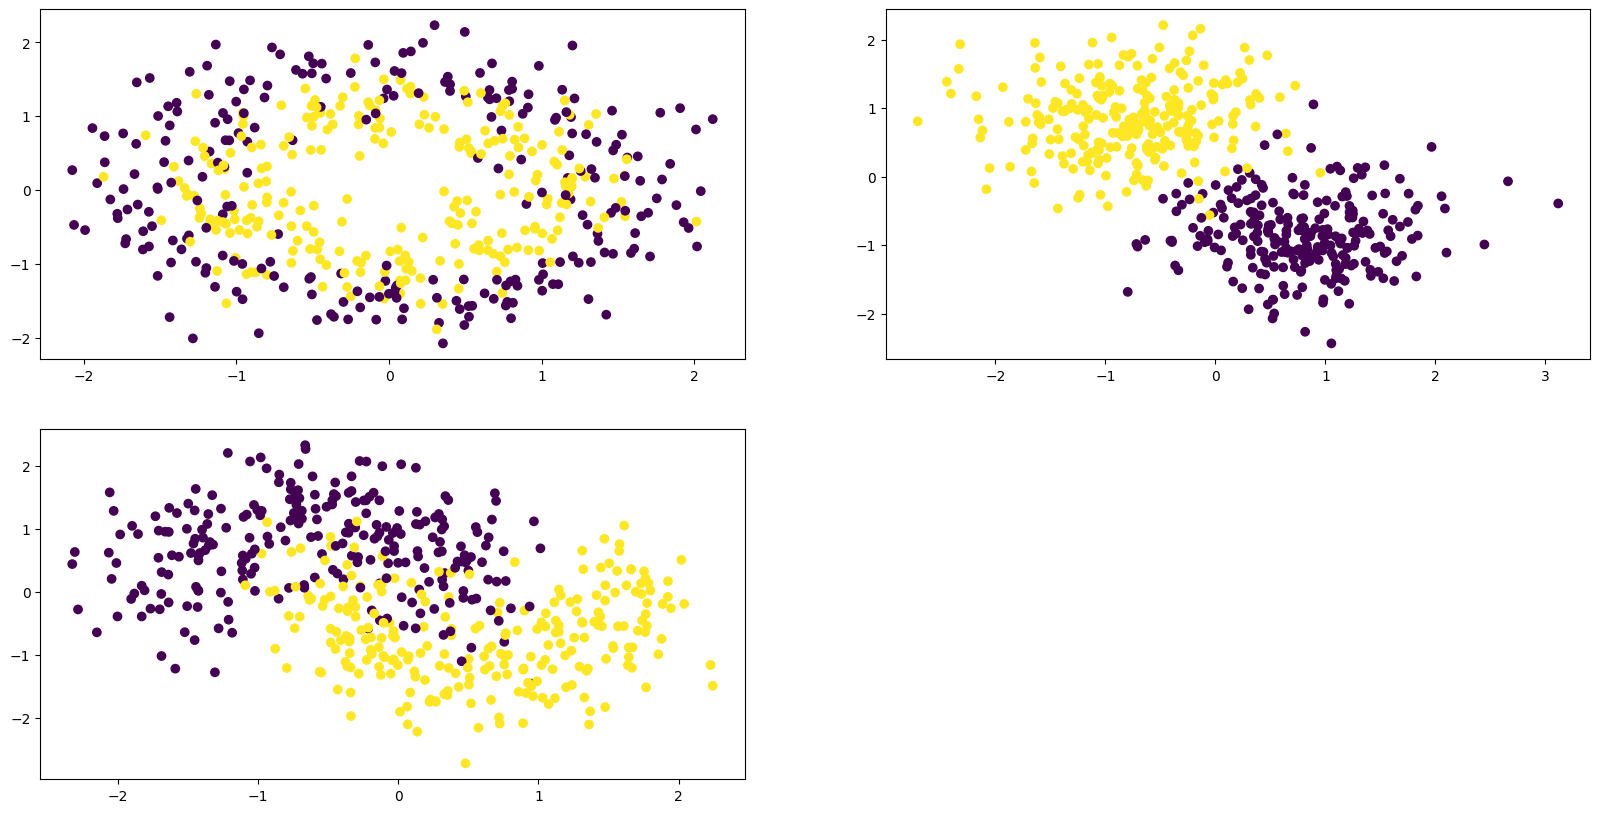

In [12]:
fig1 = plt.figure(figsize = (20, 10))
ax1 = fig1.add_subplot(221)
ax1.scatter(X_circ[:,0], X_circ[:,1], c = y_circ)
ax2 = fig1.add_subplot(222)
ax2.scatter(X_clus[:,0], X_clus[:,1], c = y_clus)
ax3 = fig1.add_subplot(223)
ax3.scatter(X_moon[:,0], X_moon[:,1], c = y_moon)

<h><b> Creación de la función objetivo </b></h>

Aquí podemos ver que esta se creó exitosamente, ya que la función dio lo mismo que evaluandola con la función cutre de ciclos for para aplicar la siguiente fórmula: 

*   $\mathcal{L} = \vec{1^T}\vec{\alpha} - \frac{1}{2}\vec{\alpha^T}\vec{\vec{K}}\vec{\alpha}$

La matriz $\vec{\vec{K}}$ se creó multiplicando cada elemento del vector $\vec{y}$ (vector de las etiquetas) con cada fila (es decir, cada dato) de la matriz de datos $\vec{\vec{X}}$. Es decir, la matriz $\vec{\vec{K}}$ se calculó de la siguiente manera:

*   $\vec{\vec{K}} = (\vec{y}*\vec{\vec{X}})(\vec{y}*\vec{\vec{X}})^T$ 

La matriz de datos $\vec{\vec{X}}$ tiene en cada fila un dato y en cada columna un feature

In [13]:
"""
#Funcion de juguete para probar la funcion del lagrangiano. Ya se probó, ambas funciones retornan lo mismo
def lagrangiano2(alpha, datos, etiquetas):
    suma1 = 0
    suma2 = 0
    N_dat = len(etiquetas)
    for i in range(len(etiquetas)):
        suma1 += alpha[i]
        for j in range(len(etiquetas)):
            suma2 += alpha[i]*alpha[j]*etiquetas[i]*etiquetas[j]*(datos[i,:].dot(datos[j,:]))
        #fin for 
    #fin for 
    lagrangiano = suma1 - 0.5*suma2
    return lagrangiano
#fin funcion          
"""  
def lagrangiano(alpha, datos, etiquetas, kernel = None, parametros_kernel = {}):
    N_datos = len(etiquetas)
    N_features = len(datos[0,:])
    unos = np.ones(N_datos)
    y = np.array([etiquetas]).T
    if kernel == None:
        K = (y*datos).dot((y*datos).T)
    elif kernel == 'polinomial':
        d = parametros_kernel['d']
        mat_kernels = (datos.dot(datos.T))**d
        yT = np.array([y]).T
        K = yT*(y*mat_kernels)
    elif kernel == 'gaussiano':
        sigma = parametros_kernel['sigma']
        X_3D = np.tile(datos.T, (N_datos,1,1))
        Xn = np.array([datos]).reshape(N_datos,N_features,1)
        omega = np.sum((X_3D - Xn)**2, axis=1)
        mat_kernels = np.exp(-omega/(2*sigma**2))
        yT = np.array([y]).T
        K = yT*(y*mat_kernels)
    #fin if 
    lagrangiano = unos.dot(alpha) - 0.5*((alpha.T).dot(K).dot(alpha))
    return -lagrangiano
#fin funcion

In [14]:
alpha_ini = np.random.rand(len(y_clus))
lam_wiki = 1
C = 0.5# 1/(2*lam_wiki*len(y_clus))
restricciones = [{'type': 'ineq', 'fun': lambda x: C-x}, 
                 {'type': 'ineq', 'fun': lambda x: x},
                 {'type': 'eq', 'fun': lambda a,datos,etiquetas: a.dot(etiquetas), 'args': (X_clus,y_clus)}]
resultados_scipy = sp.optimize.minimize(lagrangiano, alpha_ini, args=(X_clus, y_clus), method = 'SLSQP', constraints = restricciones, options = {'disp':True})#, tol = 1e-4, maxiter=50)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -17.349604823429047
            Iterations: 15
            Function evaluations: 7518
            Gradient evaluations: 15


In [15]:
alpha_optimos = np.array(resultados_scipy.x)
print(alpha_optimos)

[ 5.00000000e-01  9.32548015e-15 -3.45071165e-15  5.00000000e-01
  1.02329280e-15 -3.67577622e-15  3.81700969e-16  5.00000000e-01
 -6.33595934e-15  2.97054857e-01 -3.11786362e-15  2.06257742e-15
  3.80310104e-15  5.00000000e-01 -2.32648984e-15 -5.74760002e-15
  3.49530882e-15  1.22241873e-15  6.73778013e-15 -6.58491912e-15
  4.88773052e-15  5.98310598e-15  7.79867526e-15  5.40580359e-15
  5.00000000e-01  3.65908544e-16 -2.71626181e-14 -6.27731370e-16
  8.21946226e-15 -1.11620346e-14  6.32609576e-15 -6.29432648e-15
 -5.11266126e-15 -8.09503822e-15  1.09907552e-14 -3.98285195e-15
  2.67459604e-01  8.54535431e-15 -5.96669792e-15 -9.99435527e-15
 -1.22026650e-15 -8.81296985e-16  4.84280146e-15  1.93659074e-15
  7.20811945e-15  1.82082190e-15 -8.71217045e-15 -1.80534698e-15
  1.08995902e-15 -3.22976807e-15 -3.17057941e-15 -2.11278823e-15
 -1.90207496e-14 -1.51913450e-14 -7.94389334e-15  1.44092718e-15
 -5.95201713e-15  4.60785966e-15  5.00000000e-01  6.65374943e-15
  3.75831186e-15  3.96603

In [16]:
w = (alpha_optimos*y_clus).dot(X_clus)
b = np.average(X_clus[alpha_optimos > 1e-6].dot(w) - y_clus[alpha_optimos > 1e-6])

In [17]:
print(w)
print(b)

[-1.62403729  1.96252711]
0.05434791991057764


Text(0.5, 1.0, 'Ejemplo de clasificación con SVM')

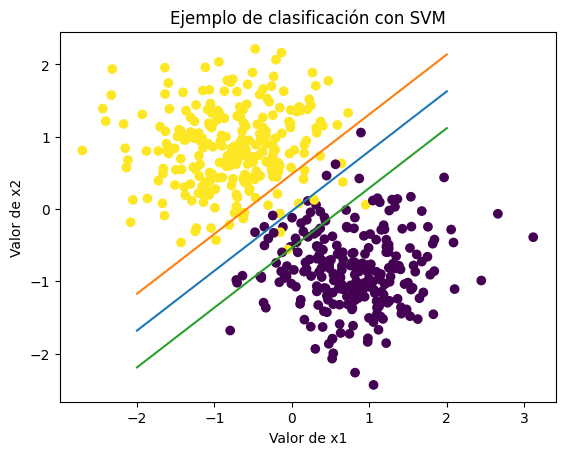

In [18]:
base = np.linspace(-2,2,len(y_clus))
linea = -(b/w[1]) - (w[0]/w[1])*base
linea_plus = (1/w[1]) -(b/w[1]) - (w[0]/w[1])*base
linea_minu = -(1/w[1]) -(b/w[1]) - (w[0]/w[1])*base
fig2 = plt.figure()
ax23 = fig2.add_subplot(111)
ax23.scatter(X_clus[:,0], X_clus[:,1], c = y_clus)
ax23.plot(base, linea, base, linea_plus, base, linea_minu)
ax23.set_xlabel("Valor de x1")
ax23.set_ylabel("Valor de x2")
ax23.set_title("Ejemplo de clasificación con SVM")